# MAST30034 Project 2 Summary Notebook

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

## Data Collection

### Main Data

For Domain dataset, we scraped down data from VIC3000 to VIC3999 and finds 4033 valid instances.

For the external datasets, we extracted five main categories: Population; Schools; PTV; Income and Hospitals. 

### Preprocessing

Firstly, we performed data cleaning, which includes removing or modifying missing data and None values. Then, we checked data with wrong format and content, after that, we removed unwanted data and unreasonable values, such as too high house prices that are not helpful for model analysis. Lastly, data smoothing was implemented, which deals with data outliers and allows the model to make better predictions. Finally, we aggregate all the external datasets together for training and testing purposes. We then split our datasets into training and testing categories with 20% cross validation.

It is worth mentioning that all of our raw data are divided by SA2, but in the subsequent analysis, suburbs with disparate postcodes are applied in order to match the properties from Domain. For features, the number of hospitals is counted per suburb in 2022. The number of schools is counted per suburb in 2022, as well as the number of stops for PTV including trains and trams. For population, the average growth rate and population in 2022 are recorded. For income, we predicted income in 2022 according to the average increasing rate from 2014 to 2017. Lastly, we calculate the distance from each property to Melbourne Central Station as one of our features.

The final data frame is shown below.

In [41]:
df = pd.read_csv("../data/curated/final_df.csv")
df

,Unnamed: 0,index,name,Postcode,Prices,Bedrooms,Bathrooms,Parkings,geometry,SA2_code,Longitude,Latitude,popu2022,popu2025,Mean Income2022,Mean Income2025,hos_count,stop_count,school_count,distance
0,0,0,811v/162 Albert Street East Melbourne VIC 3002,3002,600.0,2,1,1,POINT (144.9855313 -37.8100432),206041119,-37.810043,144.985531,4965.66944,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,2.640393
1,1,1,PO9P/191 Powlett Street East Melbourne VIC 3002,3002,675.0,2,2,1,POINT (144.9860355 -37.8101099),206041119,-37.810110,144.986036,4965.66944,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,2.127094
2,2,2,203/33 Cliveden Close East Melbourne VIC 3002,3002,380.0,1,1,1,POINT (144.9767157 -37.8171001),206041119,-37.817100,144.976716,4965.66944,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,2.317094
3,3,3,9/322 Albert Street East Melbourne VIC 3002,3002,990.0,3,2,1,POINT (144.9802739 -37.8098404),206041119,-37.809840,144.980274,4965.66944,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,1.993894
4,4,4,107K/211 Powlett Street East Melbourne VIC 3002,3002,550.0,1,1,1,POINT (144.9859936 -37.8096989),206041119,-37.809699,144.985994,4965.66944,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,1.863595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4028,4028,4031,20 Knightsford Avenue Clyde VIC 3978,3978,500.0,4,2,2,POINT (145.3419799 -38.123332),212031303,-38.123332,145.341980,17608.06316,28976.064322,71382.469390,79738.921375,0.0,0.0,5.0,55.767144
4029,4029,4032,6 Cecil Lane Clyde VIC 3978,3978,700.0,4,2,2,POINT (145.3280662 -38.1260928),212031303,-38.126093,145.328066,17608.06316,28976.064322,71382.469390,79738.921375,0.0,0.0,5.0,53.621150
4030,4030,4033,43 Bellman Avenue Clyde VIC 3978,3978,450.0,3,2,2,POINT (145.3401184 -38.1237646),212031303,-38.123765,145.340118,17608.06316,28976.064322,71382.469390,79738.921375,0.0,0.0,5.0,51.263857
4031,4031,4034,24 Swanston Street Clyde North VIC 3978,3978,570.0,4,2,2,POINT (145.3315988 -38.1257017),212031303,-38.125702,145.331599,17608.06316,28976.064322,71382.469390,79738.921375,0.0,0.0,5.0,48.481165


## Pre-Analysis

### Distribution

We assume there is no significant change in numbers of facilities in each suburb.
Below is an example of the changes for school between 2019 and 2021.

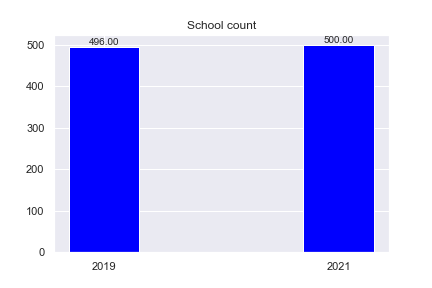

In [44]:
school_img = Image.open('../plots/school_change.png')
school_img

### Remove Outliers

For the rental price distribution, we removed the outliers to achieve a better distribution, we removed rental prices that are higher than $900. With figures below, the difference in distribution can be seen after the outlier removal.

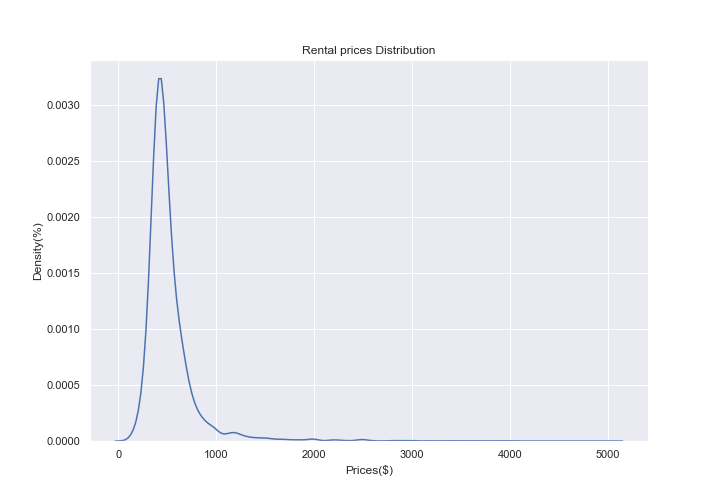

In [38]:
img1 = Image.open('../plots/rental_price_distrib_before.png')
img1

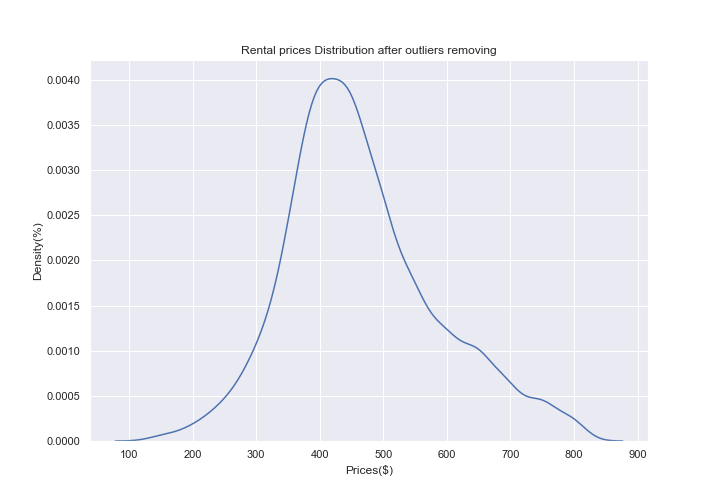

In [40]:
img2 = Image.open('../plots/rental_price_distrib_after.png')
img2

For the distance to CBD, we kept the outliers since it is reliable to take the properties in remote areas into account. With figure shown below.

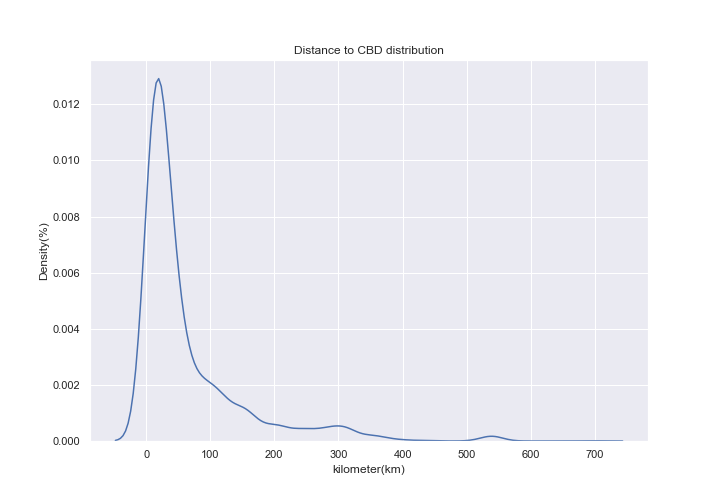

In [45]:
img3 = Image.open('../plots/distance_to_CBD_distrib.png')
img3

## Assumptions

There are a few assumptions that we made in the research. 

Firstly, as mentioned before in pre-analysis, we assume there is no significant change in the number of facilities such as schools and hospitals from 2022 to 2025. We did find the number of schools in 2019 and 2021. And by comparison, we found the change rate is small enough to prove our assumption. However, since we lacked of the data of hospitals in 2019, it was hard to show the increase of hospiotals between 2019 and 2021. As 2012 data was found, we still compared the number of hospotals in 2012 and 2021. There was a big increase within 9 years. It could be explained by the pandemic of Covid-19 in the past few years. Hence, it is reasonable to apply this to the future 3 years.


In [ ]:
school_img = Image.open('../plots/school_change.png')

school_img

In [ ]:
hos_img = Image.open('../plots/hos_change.png')

hos_img

Secondly, the income data for 2022 based on SA2 district was not found. Then we assume the income in 2022 can be predicted by using the average growth rate from 2014 to 2017. The code below shows how we calculate the average growth rate and achieve the income for 2022.

In [ ]:
for i in gpd_domain.index:
    inco_rate.append(float((gpd_domain['Income2017'][i] - gpd_domain['Income2014'][i])/
                           gpd_domain['Income2014'][i]))
gpd_domain['rate14-17'] = np.array(inco_rate).tolist()
gpd_domain['rate14-17'] = np.array(inco_rate).tolist()
inco2019 = []
inco2022 = []
for i in gpd_domain.index:
    inco2019.append(gpd_domain['Income2016'][i] + gpd_domain['Income2016'][i]*
                    float(gpd_domain['rate14-17'][i]))
gpd_domain['Income2019'] = np.array(inco2019).tolist()
for i in gpd_domain.index:
    inco2022.append(gpd_domain['Income2019'][i] + gpd_domain['Income2019'][i]*
                    float(gpd_domain['rate14-17'][i]))
gpd_domain['Income2022'] = np.array(inco2022).tolist()

Moreover, we assume we only take acount of the medium rental prices in this research. By doing so, we can detect that rental prices approximately follow a normal distribution after the outliers based on the interquaitile range are removed.


In [ ]:
rental_price_distrib_before = Image.open('../plots/rental_price_distrib_before.png')

rental_price_distrib_before

In [ ]:
rental_price_distrib_after = Image.open('../plots/rental_price_distrib_after.png')

rental_price_distrib_after

In addition, we assume the properties in remote areas should be considered. In this case, we did not remove the properties which have large distance to CBD.

Finally, since the granularity of data collection is SA2-based, for our purpose of this research, the external features is changed from per SA2 to per suburb by assuming the number of them in adjacent suburbs in one SA2 district is proportional to the number of properties in each suburb.